In [23]:
import pandas as pd

In [24]:
# the columns we need for this analysis
races_df = pd.read_csv('dataset/races.csv')
results_df = pd.read_csv('dataset/results.csv')
drivers_df = pd.read_csv('dataset/drivers.csv')
pit_stops_df = pd.read_csv('dataset/pit_stops.csv')

In [25]:
# Join the results and pit stops data frames
joined_df = pd.merge(results_df, pit_stops_df, on=['raceId', 'driverId'])
joined_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,stop,lap,time_y,duration,milliseconds_y
0,20779,841,20,9,1,1,1,1,1,25.0,...,44,4,1:29.844,212.488,1,1,14,17:25:17,22.603,22603
1,20779,841,20,9,1,1,1,1,1,25.0,...,44,4,1:29.844,212.488,1,2,36,17:59:17,24.036,24036
2,20780,841,1,1,3,2,2,2,2,18.0,...,41,8,1:30.314,211.382,1,1,16,17:28:24,23.227,23227
3,20780,841,1,1,3,2,2,2,2,18.0,...,41,8,1:30.314,211.382,1,2,36,17:59:29,23.199,23199
4,20781,841,808,4,10,6,3,3,3,15.0,...,55,7,1:30.064,211.969,1,1,16,17:28:39,24.535,24535


In [26]:

# Filter the joined data frame to only include rows where the driver finished in position 1
winner_df= joined_df[joined_df['position'] == '1']
winner_df.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,stop,lap,time_y,duration,milliseconds_y
0,20779,841,20,9,1,1,1,1,1,25.0,...,44,4,1:29.844,212.488,1,1,14,17:25:17,22.603,22603
1,20779,841,20,9,1,1,1,1,1,25.0,...,44,4,1:29.844,212.488,1,2,36,17:59:17,24.036,24036
45,20801,842,20,9,1,1,1,1,1,25.0,...,33,6,1:41.539,196.523,1,1,13,16:26:17,23.019,23019
46,20801,842,20,9,1,1,1,1,1,25.0,...,33,6,1:41.539,196.523,1,2,25,16:47:27,21.893,21893
47,20801,842,20,9,1,1,1,1,1,25.0,...,33,6,1:41.539,196.523,1,3,41,17:15:08,22.313,22313


In [27]:

# Merge the winner_df with drivers_df to get the name of the winner driver
winner_df = pd.merge(winner_df, drivers_df[['driverId', 'forename', 'surname']], on='driverId')
winner_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,stop,lap,time_y,duration,milliseconds_y,forename,surname
0,20779,841,20,9,1,1,1,1,1,25.0,...,1:29.844,212.488,1,1,14,17:25:17,22.603,22603,Sebastian,Vettel
1,20779,841,20,9,1,1,1,1,1,25.0,...,1:29.844,212.488,1,2,36,17:59:17,24.036,24036,Sebastian,Vettel
2,20801,842,20,9,1,1,1,1,1,25.0,...,1:41.539,196.523,1,1,13,16:26:17,23.019,23019,Sebastian,Vettel
3,20801,842,20,9,1,1,1,1,1,25.0,...,1:41.539,196.523,1,2,25,16:47:27,21.893,21893,Sebastian,Vettel
4,20801,842,20,9,1,1,1,1,1,25.0,...,1:41.539,196.523,1,3,41,17:15:08,22.313,22313,Sebastian,Vettel


In [28]:

# Merge the winner_df with races_df to get the name of the race and the year
winner_df = pd.merge(winner_df, races_df[['raceId', 'name', 'year']], on='raceId')
winner_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,statusId,stop,lap,time_y,duration,milliseconds_y,forename,surname,name,year
0,20779,841,20,9,1,1,1,1,1,25.0,...,1,1,14,17:25:17,22.603,22603,Sebastian,Vettel,Australian Grand Prix,2011
1,20779,841,20,9,1,1,1,1,1,25.0,...,1,2,36,17:59:17,24.036,24036,Sebastian,Vettel,Australian Grand Prix,2011
2,20801,842,20,9,1,1,1,1,1,25.0,...,1,1,13,16:26:17,23.019,23019,Sebastian,Vettel,Malaysian Grand Prix,2011
3,20801,842,20,9,1,1,1,1,1,25.0,...,1,2,25,16:47:27,21.893,21893,Sebastian,Vettel,Malaysian Grand Prix,2011
4,20801,842,20,9,1,1,1,1,1,25.0,...,1,3,41,17:15:08,22.313,22313,Sebastian,Vettel,Malaysian Grand Prix,2011


In [29]:

# Group the resulting data frame by race and select the number of pit stops made by the winner in each race
pit_stops_by_race = winner_df.groupby(['raceId', 'name', 'year', 'forename', 'surname'])['stop'].count()
pit_stops_by_race.head()

raceId  name                   year  forename   surname 
841     Australian Grand Prix  2011  Sebastian  Vettel      2
842     Malaysian Grand Prix   2011  Sebastian  Vettel      3
843     Chinese Grand Prix     2011  Lewis      Hamilton    3
844     Turkish Grand Prix     2011  Sebastian  Vettel      4
845     Spanish Grand Prix     2011  Sebastian  Vettel      4
Name: stop, dtype: int64

In [30]:

# Print the resulting DataFrame
print(pit_stops_by_race.reset_index().to_string(index=False, header=['race_id','Race', 'Year', 'Winner', 'Surname', 'Pit Stops']))

race_id                        Race Year    Winner    Surname Pit Stops
    841       Australian Grand Prix 2011 Sebastian     Vettel         2
    842        Malaysian Grand Prix 2011 Sebastian     Vettel         3
    843          Chinese Grand Prix 2011     Lewis   Hamilton         3
    844          Turkish Grand Prix 2011 Sebastian     Vettel         4
    845          Spanish Grand Prix 2011 Sebastian     Vettel         4
    846           Monaco Grand Prix 2011 Sebastian     Vettel         1
    847         Canadian Grand Prix 2011    Jenson     Button         6
    848         European Grand Prix 2011 Sebastian     Vettel         3
    849          British Grand Prix 2011  Fernando     Alonso         3
    850           German Grand Prix 2011     Lewis   Hamilton         3
    851        Hungarian Grand Prix 2011    Jenson     Button         3
    852          Belgian Grand Prix 2011 Sebastian     Vettel         3
    853          Italian Grand Prix 2011 Sebastian     Vettel   

In [31]:
# get the number of pitstops for the following races
# Australian Grand Prix
# australian_stops = pit_stops_by_race [pit_stops_by_race['name'] == 'Australian Grand Prix']


pit_stops_by_race.columns= pit_stops_by_race.iloc[0]
# make the first row the heads



In [32]:
# to cs
pit_stops_by_race.to_csv('pit_stops_by_race.csv')


In [33]:
pit_stops_by_race = pd.read_csv('pit_stops_by_race.csv')

In [34]:
pit_stops_by_race.head()

,raceId,name,year,forename,surname,stop
0,841,Australian Grand Prix,2011,Sebastian,Vettel,2
1,842,Malaysian Grand Prix,2011,Sebastian,Vettel,3
2,843,Chinese Grand Prix,2011,Lewis,Hamilton,3
3,844,Turkish Grand Prix,2011,Sebastian,Vettel,4
4,845,Spanish Grand Prix,2011,Sebastian,Vettel,4


In [35]:
australian_stops = pit_stops_by_race [pit_stops_by_race['name'] == 'Australian Grand Prix']
print("len australia = ", len(australian_stops))
# Monaco Grand Prix
monaco_stops = pit_stops_by_race [ pit_stops_by_race['name'] == 'Monaco Grand Prix']
print("len monaco = ", len(monaco_stops))

# Belgian Grand Prix
belgian_stops = pit_stops_by_race [ pit_stops_by_race['name'] == 'Belgian Grand Prix']
print("len bekgium = ", len(belgian_stops))

# Italian Grand Prix
italian_stops = pit_stops_by_race [ pit_stops_by_race['name'] == 'Italian Grand Prix']
print("len italisn = ", len(italian_stops))

# british Grand Prix
british_stops = pit_stops_by_race [ pit_stops_by_race['name'] == 'British Grand Prix']
print("len british = ", len(british_stops))


len australia =  10
len monaco =  11
len bekgium =  11
len italisn =  12
len british =  12


In [38]:
pit_stops_by_race = pit_stops_by_race[ pit_stops_by_race['stop'] <5 ]

australian_stops = pit_stops_by_race [pit_stops_by_race['name'] == 'Australian Grand Prix']
print("len australia = ", len(australian_stops))
# Monaco Grand Prix
monaco_stops = pit_stops_by_race [ pit_stops_by_race['name'] == 'Monaco Grand Prix']
print("len monaco = ", len(monaco_stops))

# Belgian Grand Prix
belgian_stops = pit_stops_by_race [ pit_stops_by_race['name'] == 'Belgian Grand Prix']
print("len bekgium = ", len(belgian_stops))

# Italian Grand Prix
italian_stops = pit_stops_by_race [ pit_stops_by_race['name'] == 'Italian Grand Prix']
print("len italisn = ", len(italian_stops))

# british Grand Prix
british_stops = pit_stops_by_race [ pit_stops_by_race['name'] == 'British Grand Prix']
print("len british = ", len(british_stops))

brazilian_stops = pit_stops_by_race [ pit_stops_by_race['name'] == 'Brazilian Grand Prix']
print("len brazilian = ", len(brazilian_stops))


british_stops.head()

len australia =  10
len monaco =  11
len bekgium =  11
len italisn =  12
len british =  12
len brazilian =  10


,raceId,name,year,forename,surname,stop
8,849,British Grand Prix,2011,Fernando,Alonso,3
27,868,British Grand Prix,2012,Mark,Webber,2
46,887,British Grand Prix,2013,Nico,Rosberg,3
66,908,British Grand Prix,2014,Lewis,Hamilton,2
85,934,British Grand Prix,2015,Lewis,Hamilton,2


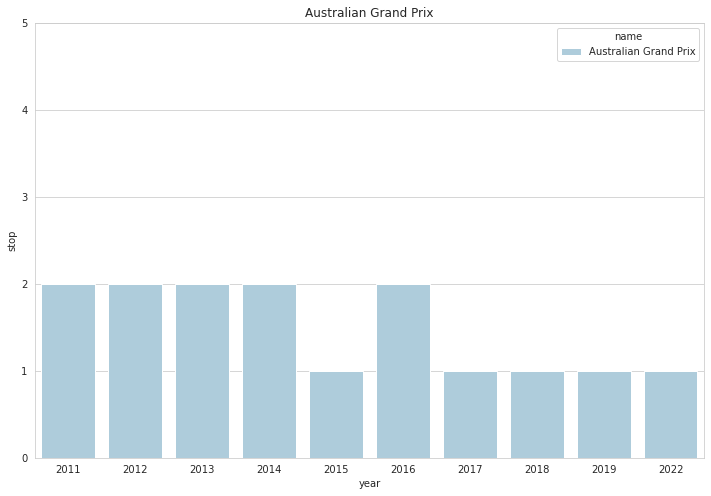

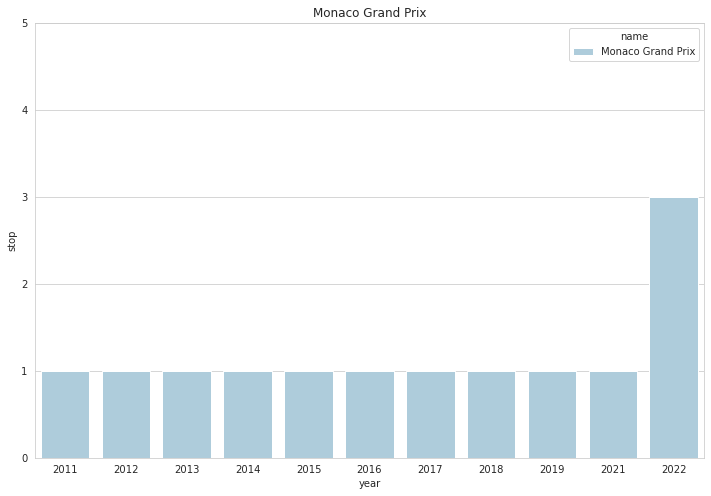

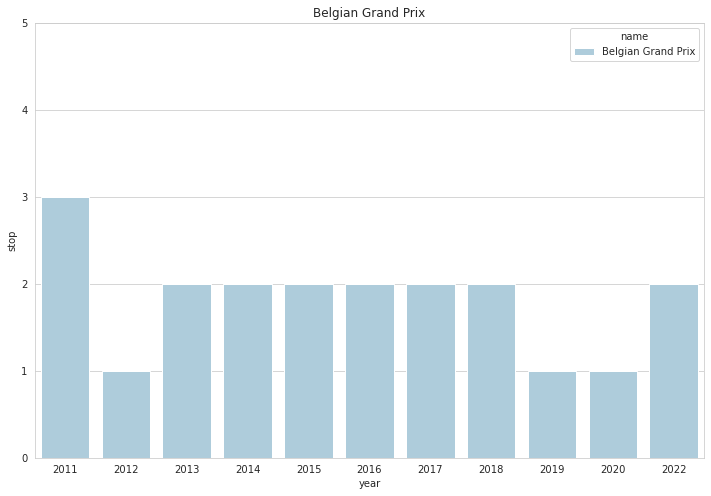

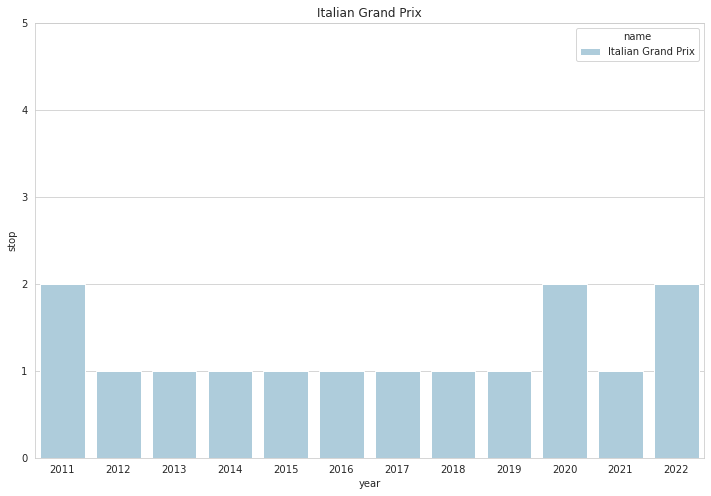

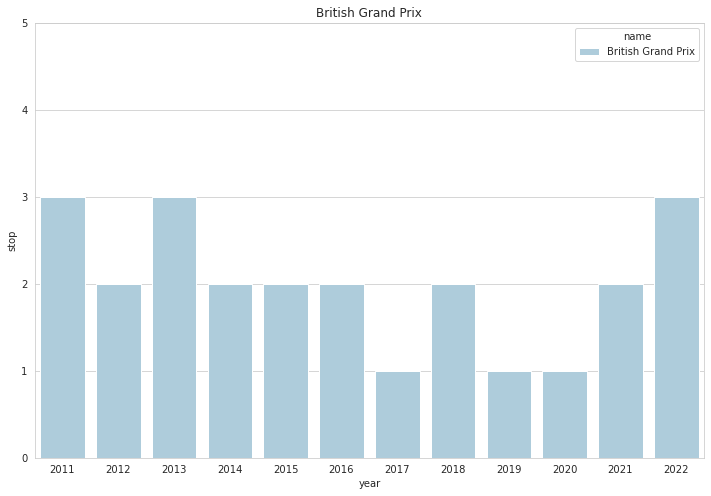

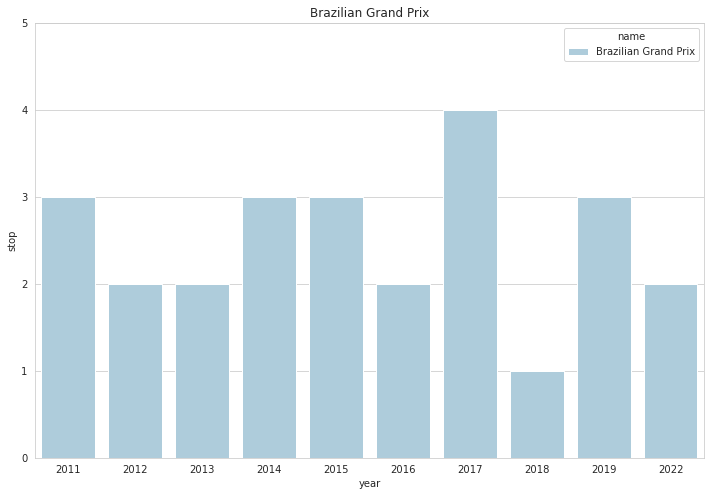

In [64]:
# bar chart for each per year
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of the axes and the text color
sns.set_style("whitegrid")
sns.set_color_codes("muted")

# set the figure size
# plt.figure(figsize=(12, 8))


plt.figure(figsize=(12, 8))
# make the max number 4


sns.barplot(data=australian_stops, x='year', y='stop', hue='name')
plt.ylim(0, 5)

# make it bigger and colroful
# colors
plt.title('Australian Grand Prix')
plt.show()
plt.figure(figsize=(12, 8))

sns.barplot(data=monaco_stops, x='year', y='stop', hue='name')
plt.ylim(0, 5)
plt.title('Monaco Grand Prix')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=belgian_stops, x='year', y='stop', hue='name')
plt.ylim(0, 5)
plt.title('Belgian Grand Prix')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=italian_stops, x='year', y='stop', hue='name')
plt.ylim(0, 5)
plt.title('Italian Grand Prix')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=british_stops, x='year', y='stop', hue='name')
plt.ylim(0, 5)
plt.title('British Grand Prix')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=brazilian_stops, x='year', y='stop', hue='name')
plt.ylim(0, 5)
plt.title('Brazilian Grand Prix')
plt.show()




In [61]:
pit_stops_by_race = pit_stops_by_race [ pit_stops_by_race['stop'] <5 ]
avg_pitstops_by_name = pit_stops_by_race.groupby('name')['stop'].mean().reset_index()
# avg_pitstops_by_name

In [55]:
wanted_races = ['Australian Grand Prix', 'Monaco Grand Prix', 'Belgian Grand Prix', 'Italian Grand Prix', 'British Grand Prix', 'Brazilian Grand Prix']

races_dict = {}
for race in wanted_races:
    races_dict[race] = avg_pitstops_by_name[avg_pitstops_by_name['name'] == race]['stop'].to_list()[0]
    print(avg_pitstops_by_name[avg_pitstops_by_name['name'] == race]['stop'].to_list()[0])
    


1.5
1.1818181818181819
1.8181818181818181
1.25
2.0
2.5


In [56]:
# print races_dict
for key, vale in races_dict.items():
    print(key, vale)

Australian Grand Prix 1.5
Monaco Grand Prix 1.1818181818181819
Belgian Grand Prix 1.8181818181818181
Italian Grand Prix 1.25
British Grand Prix 2.0
Brazilian Grand Prix 2.5


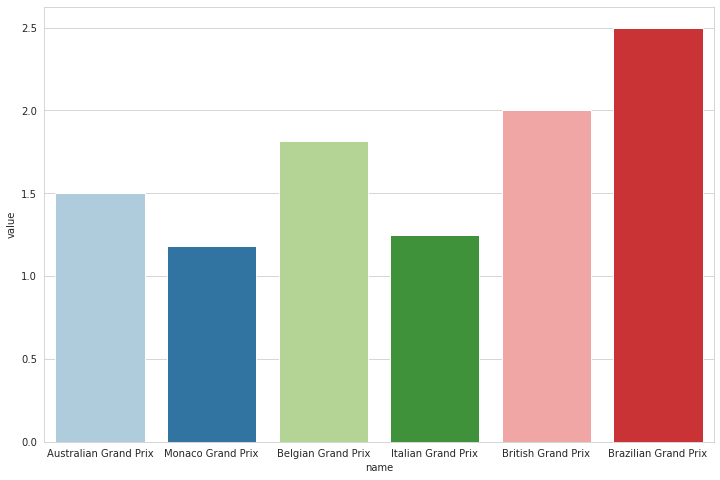

In [66]:
# plot 
df = pd.DataFrame(list(races_dict.items()), columns=['name', 'value'])
# bigger plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='name', y='value')

# display the plot
plt.show()